# Sales Prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [2]:
#Getting data
features=pd.read_csv("features.csv")
store=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
#reseting train
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [5]:
#merging train and feature
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
#marging store with data
data=pd.merge(data,store,on=['Store'],how='inner')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [7]:
#sorting values of Data
data=data.sort_values(by='Date')
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


## Analyzing the data 

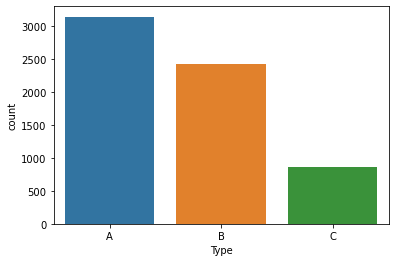

In [9]:
#Count plot of Type
sns.countplot(x="Type", data=data)

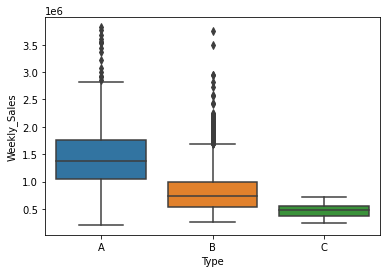

In [10]:
#Box plot of Type and Weekly_Sales
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

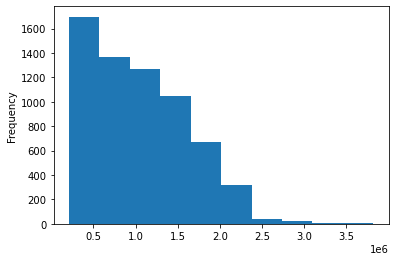

In [11]:
#Histogram of Weekly_sales
data["Weekly_Sales"].plot.hist()

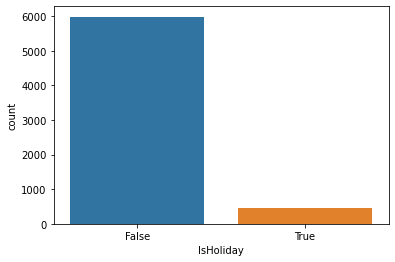

In [12]:
#Count plot of IsHoliday
sns.countplot(x="IsHoliday", data=data)

In [13]:
#we check the null values of data
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

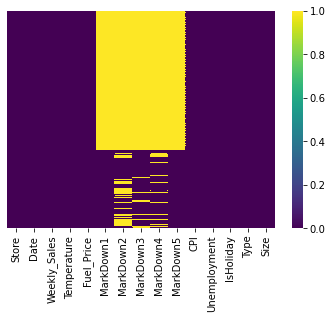

In [14]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

### Manipulating data. Transforming into useful information and deleting unnecessary items. Getting the final data. Removing the unnecessary columns. 

In [15]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988


In [16]:
#checking for null values to verify that data is clean.

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

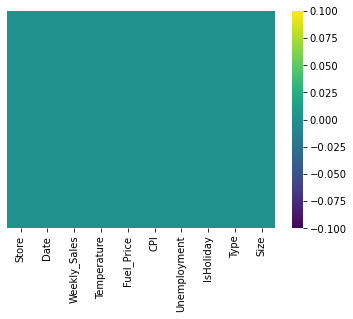

In [17]:
#Heatmap for verifying there are no null values in data.

sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [18]:
#Converting IsHoliday in Holiday which is integer and 1 for holiday and 0 otherwise.

data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0


Converting type to an integer by one-hot encoding. The first column is also removed because we know of both columns B and C are 0 then it is A-type. So B=1 and C=0 for B.B=0 and C=1 for C.B=0 and C=0 for A.

In [19]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head()

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1


In [20]:
#Concating type_dummy with data.

data=pd.concat([data,Type_dummy],axis=1)
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1


In [ ]:
#We only use integer so we removing non-integer columns after transforming it into integer form.

data=data.drop(['Type','IsHoliday'],axis=1)
data.drop()

In [23]:
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1


In [30]:
#splitting data in input and output
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
#Applying linear regression and fit the training data into it.

LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

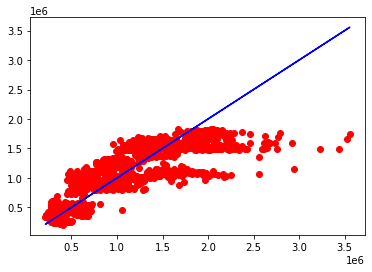

In [32]:
#Predicting the data for test value as per linear regression.

y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [33]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

329536.83821708796


In [34]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.6694762051940704


Now, if we want to predict the weekly sales. Then we give particular tuple to input in the model and predict the weekly sales as output. Here I’m showing an example of that.

In [35]:
prediction=LR.predict(pd.DataFrame([(40.37,2.876,173.325456,7.934,103464,0,0,0)]))
print(prediction)

[764498.33600528]
